In [10]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import norm
import pprint as pp
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [11]:
portfolio1 = pd.read_csv('Portfolio 1.csv')
portfolio2 = pd.read_csv('Portfolio 2.csv')
portfolio3 = pd.read_csv('Portfolio 3.csv')
portfolio4 = pd.read_csv('Portfolio x.csv')

#sort portfolio by asset
portfolio1 = portfolio1.sort_values(by=['Asset'])
portfolio2 = portfolio2.sort_values(by=['Asset'])
portfolio3 = portfolio3.sort_values(by=['Asset'])
portfolio4 = portfolio4.sort_values(by=['Asset'])


In [12]:
START_DATE = '2017-01-01'
END_DATE = '2022-01-01'

START_DATE = '2022-04-01'
END_DATE = '2022-10-01'

N_DAYS=252
N_SIMULATION = 10**5

TICKERS1 =  portfolio1['Asset'].tolist()
TICKERS2 =  portfolio2['Asset'].tolist()
TICKERS3 =  portfolio3['Asset'].tolist()
TICKERS4 =  portfolio4['Asset'].tolist()

WEIGHT1 = portfolio1['Weight'].tolist()
WEIGHT2 = portfolio2['Weight'].tolist()
WEIGHT3 = portfolio3['Weight'].tolist()
WEIGHT4 = portfolio4['Weight'].tolist()

N_ASSETS1 = len(TICKERS1)
N_ASSETS2 = len(TICKERS2)
N_ASSETS3 = len(TICKERS3)
N_ASSETS4 = len(TICKERS4)

prices1_df = yf.download(TICKERS1, start=START_DATE, 
                        end=END_DATE, adjusted=True)

prices2_df = yf.download(TICKERS2, start=START_DATE,
                        end=END_DATE, adjusted=True)

prices3_df = yf.download(TICKERS3, start=START_DATE,
                        end=END_DATE, adjusted=True)

prices4_df = yf.download(TICKERS4, start=START_DATE,
                        end=END_DATE, adjusted=True)
                        
adj_close1_df = prices1_df['Adj Close']
adj_close2_df = prices2_df['Adj Close']
adj_close3_df = prices3_df['Adj Close']
adj_close4_df = prices4_df['Adj Close']

pct_returns1_df = adj_close1_df.pct_change().dropna()
pct_returns2_df = adj_close2_df.pct_change().dropna()
pct_returns3_df = adj_close3_df.pct_change().dropna()
pct_returns4_df = adj_close4_df.pct_change().dropna()

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed


In [13]:
# apply the weights to returns
wt_portfolio_ret1 = pct_returns1_df * WEIGHT1
wt_portfolio_ret2 = pct_returns2_df * WEIGHT2
wt_portfolio_ret3 = pct_returns3_df * WEIGHT3
wt_portfolio_ret4 = pct_returns4_df * WEIGHT4

# calculate the portfolio returns
portfolio_returns1 = wt_portfolio_ret1.sum(axis = 1)
portfolio_returns2 = wt_portfolio_ret2.sum(axis = 1)
portfolio_returns3 = wt_portfolio_ret3.sum(axis = 1)
portfolio_returns4 = wt_portfolio_ret4.sum(axis = 1)

cum_ret_port1 = (portfolio_returns1 + 1).cumprod() - 1
cum_ret_port2 = (portfolio_returns2 + 1).cumprod() - 1
cum_ret_port3 = (portfolio_returns3 + 1).cumprod() - 1
cum_ret_port4 = (portfolio_returns4 + 1).cumprod() - 1

total_return1 = cum_ret_port1.tail(1)
total_return2 = cum_ret_port2.tail(1)
total_return3 = cum_ret_port3.tail(1)
total_return4 = cum_ret_port4.tail(1)

# date actually started on '2022-04-04' instead of '2022-04-01', thus minus 3 days from the 5 years period
annualized_ret_portfolio1 = ((1+total_return1)**(1/((365*5-3)/365)))-1
annualized_ret_portfolio2 = ((1+total_return2)**(1/((365*5-3)/365)))-1
annualized_ret_portfolio3 = ((1+total_return3)**(1/((365*5-3)/365)))-1
annualized_ret_portfolio4 = ((1+total_return4)**(1/((365*5-3)/365)))-1

print('Portfolio 1 Annualized Return: ', annualized_ret_portfolio1[0])
print('Portfolio 2 Annualized Return: ', annualized_ret_portfolio2[0])
print('Portfolio 3 Annualized Return: ', annualized_ret_portfolio3[0])
print('Portfolio x Annualized Return: ', annualized_ret_portfolio4[0])

Portfolio 1 Annualized Return:  -0.04095109295512844
Portfolio 2 Annualized Return:  -0.030496172742402572
Portfolio 3 Annualized Return:  -0.04098196018216571
Portfolio x Annualized Return:  -0.043574919067397966


[*********************100%***********************]  1 of 1 completed


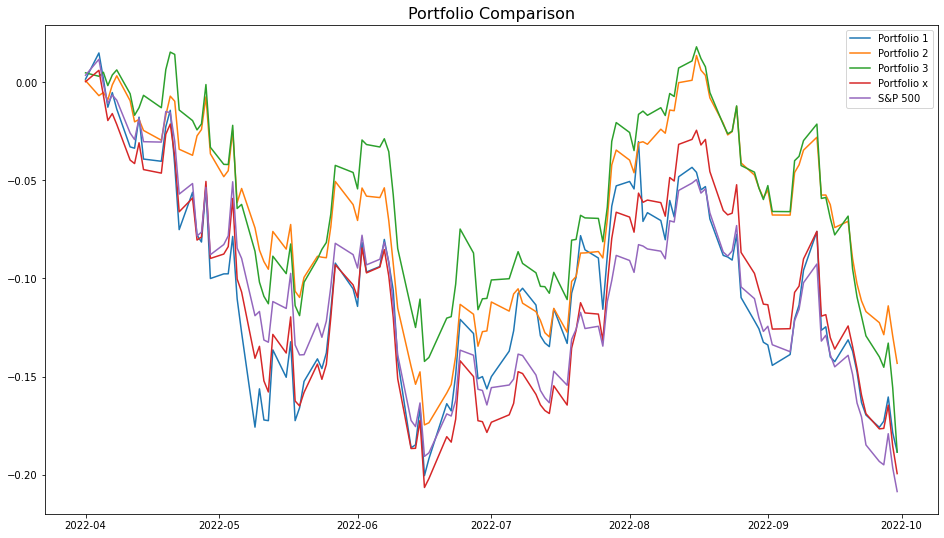

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
#add title
ax.set_title('Portfolio Comparison', fontsize=16)
ax.plot(cum_ret_port1, label='Portfolio 1')
ax.plot(cum_ret_port2, label='Portfolio 2')
ax.plot(cum_ret_port3, label='Portfolio 3')
ax.plot(cum_ret_port4, label='Portfolio x')

#plot snp500
snp500 = yf.download('^GSPC', start=START_DATE, end=END_DATE, adjusted=True)
snp500 = snp500['Adj Close']
snp500 = snp500.pct_change().dropna()
snp500 = (snp500 + 1).cumprod() - 1
ax.plot(snp500, label='S&P 500')


ax.legend()

In [15]:
#calculate beta against S&P 500
sp500_df = yf.download('^GSPC', start=START_DATE,
                       end=END_DATE, adjusted=True)
sp500_df = sp500_df['Adj Close'].pct_change().dropna()

#create a dataframe with the portfolio and S&P 500
beta_portfolio_df = pd.DataFrame({'Portfolio1': portfolio_returns1,
                                    'Portfolio2': portfolio_returns2,
                                    'Portfolio3': portfolio_returns3,
                                    'Portfoliox': portfolio_returns4,
                                    'S&P 500': sp500_df})

#calculate correlation
corr1 = beta_portfolio_df.corr().iloc[4,0]
print(f'Correlation of Portfolio 1: {corr1:.5f}')

corr2 = beta_portfolio_df.corr().iloc[4,1]
print(f'Correlation of Portfolio 2: {corr2:.5f}')

corr3 = beta_portfolio_df.corr().iloc[4,2]
print(f'Correlation of Portfolio 3: {corr3:.5f}')

corr4 = beta_portfolio_df.corr().iloc[4,3]
print(f'Correlation of Portfolio x: {corr4:.5f}')

#calculate Beta of Portfolio 1 against S&P 500
cov1 = beta_portfolio_df['Portfolio1'].cov(beta_portfolio_df['S&P 500'])
var1 = beta_portfolio_df['S&P 500'].var()
beta1 = cov1/var1
print(f'Beta of Portfolio 1: {beta1:.5f}')

#calculate Beta of Portfolio 2 against S&P 500
cov2 = beta_portfolio_df['Portfolio2'].cov(beta_portfolio_df['S&P 500'])
var2 = beta_portfolio_df['S&P 500'].var()
beta2 = cov2/var2
print(f'Beta of Portfolio 2: {beta2:.5f}')

#calculate Beta of Portfolio 3 against S&P 500
cov3 = beta_portfolio_df['Portfolio3'].cov(beta_portfolio_df['S&P 500'])
var3 = beta_portfolio_df['S&P 500'].var()
beta3 = cov3/var3
print(f'Beta of Portfolio 3: {beta3:.5f}')

#calculate Beta of Portfolio x against S&P 500
cov4 = beta_portfolio_df['Portfoliox'].cov(beta_portfolio_df['S&P 500'])
var4 = beta_portfolio_df['S&P 500'].var()
beta4 = cov4/var4
print(f'Beta of Portfolio x: {beta4:.5f}')

#calculate Sharpe Ratio
sharpe_ratio1 = (portfolio_returns1.mean())/portfolio_returns1.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio 1: {sharpe_ratio1:.5f}')

sharpe_ratio2 = (portfolio_returns2.mean())/portfolio_returns2.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio 2: {sharpe_ratio2:.5f}')

sharpe_ratio3 = (portfolio_returns3.mean())/portfolio_returns3.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio 3: {sharpe_ratio3:.5f}')

sharpe_ratio4 = (portfolio_returns4.mean())/portfolio_returns4.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio x: {sharpe_ratio4:.5f}')

[*********************100%***********************]  1 of 1 completed
Correlation of Portfolio 1: 0.92333
Correlation of Portfolio 2: 0.88020
Correlation of Portfolio 3: 0.88876
Correlation of Portfolio x: 0.98013
Beta of Portfolio 1: 1.20735
Beta of Portfolio 2: 0.78417
Beta of Portfolio 3: 0.90174
Beta of Portfolio x: 1.13330
Sharpe Ratio of Portfolio 1: -1.11302
Sharpe Ratio of Portfolio 2: -1.27702
Sharpe Ratio of Portfolio 3: -1.51980
Sharpe Ratio of Portfolio x: -1.39376


Beta only (6m): (1 stock)
corr: 0.56
beta: 0.49
sharpe: 0.28

Corr only (6m): (1 stock)
Correlation: 0.69
Beta: 1.28
sharpe: -1.74

beta *corr**2 (6m): (1 stock)
Correlation: 0.78
Beta: 1.01
sharpe: -1.53

beta *corr (6m): (1 stock)
Correlation: 0.77
Beta: 1.23
sharpe: -1.95

sharpe/beta (6m): (5 stock)
Correlation: 0.86
Beta: 0.87
sharpe: -0.98



In [16]:
beta_portfolio_df.corr()

,Portfolio1,Portfolio2,Portfolio3,Portfoliox,S&P 500
Portfolio1,1.000000,0.815622,0.830707,0.954408,0.923334
Portfolio2,0.815622,1.000000,0.956843,0.901392,0.880196
Portfolio3,0.830707,0.956843,1.000000,0.911348,0.888762
Portfoliox,0.954408,0.901392,0.911348,1.000000,0.980133
S&P 500,0.923334,0.880196,0.888762,0.980133,1.000000


Start date,2022-04-01
End date,2022-09-30
Total months,6
,Backtest
Annual return,-34.1%
Cumulative returns,-18.8%
Annual volatility,32.7%
Sharpe ratio,-1.11
Calmar ratio,-1.61
Stability,0.10
Max drawdown,-21.2%


Start date,2022-04-01
End date,2022-09-30
Total months,6
,Backtest
Annual return,-35.9%
Cumulative returns,-19.9%
Annual volatility,28.9%
Sharpe ratio,-1.39
Calmar ratio,-1.70
Stability,0.07
Max drawdown,-21.1%


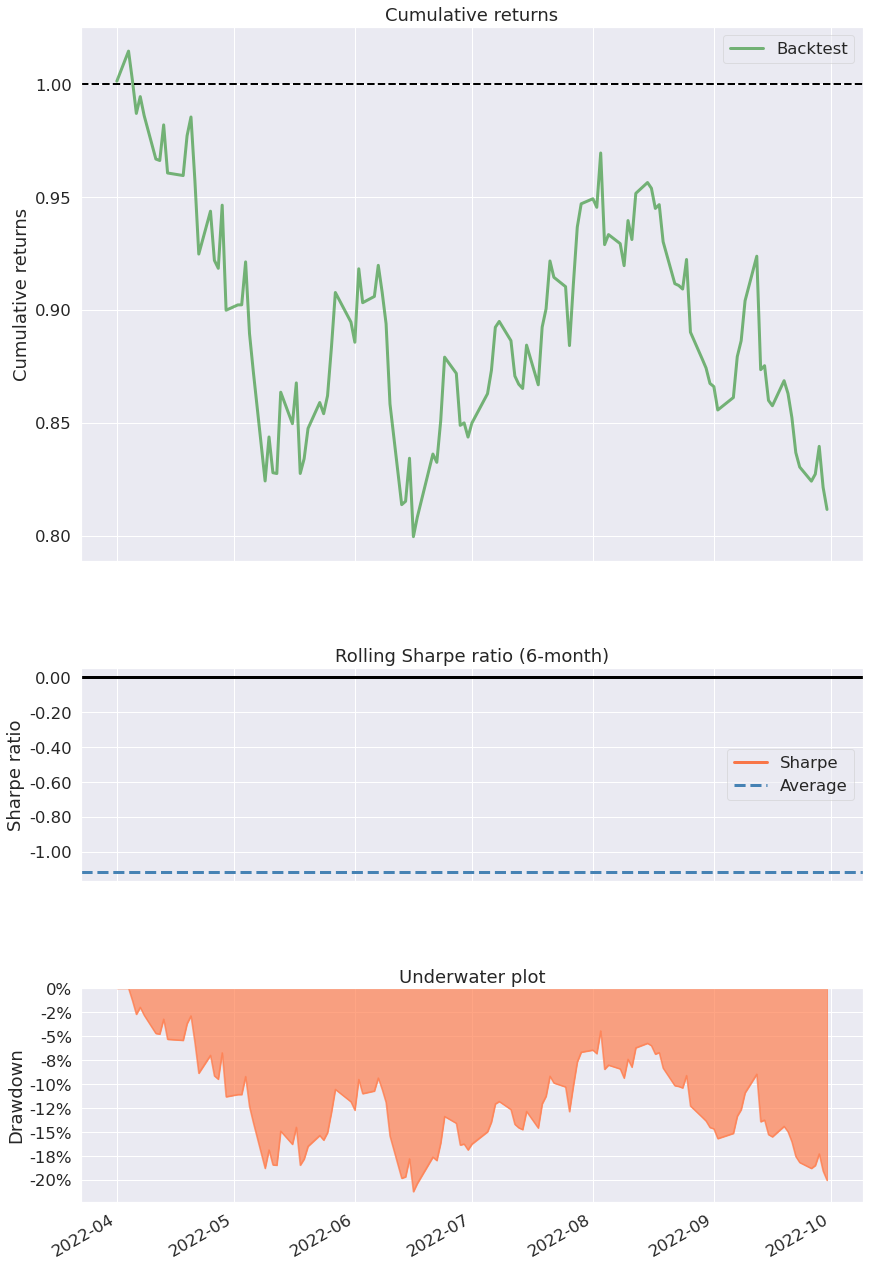

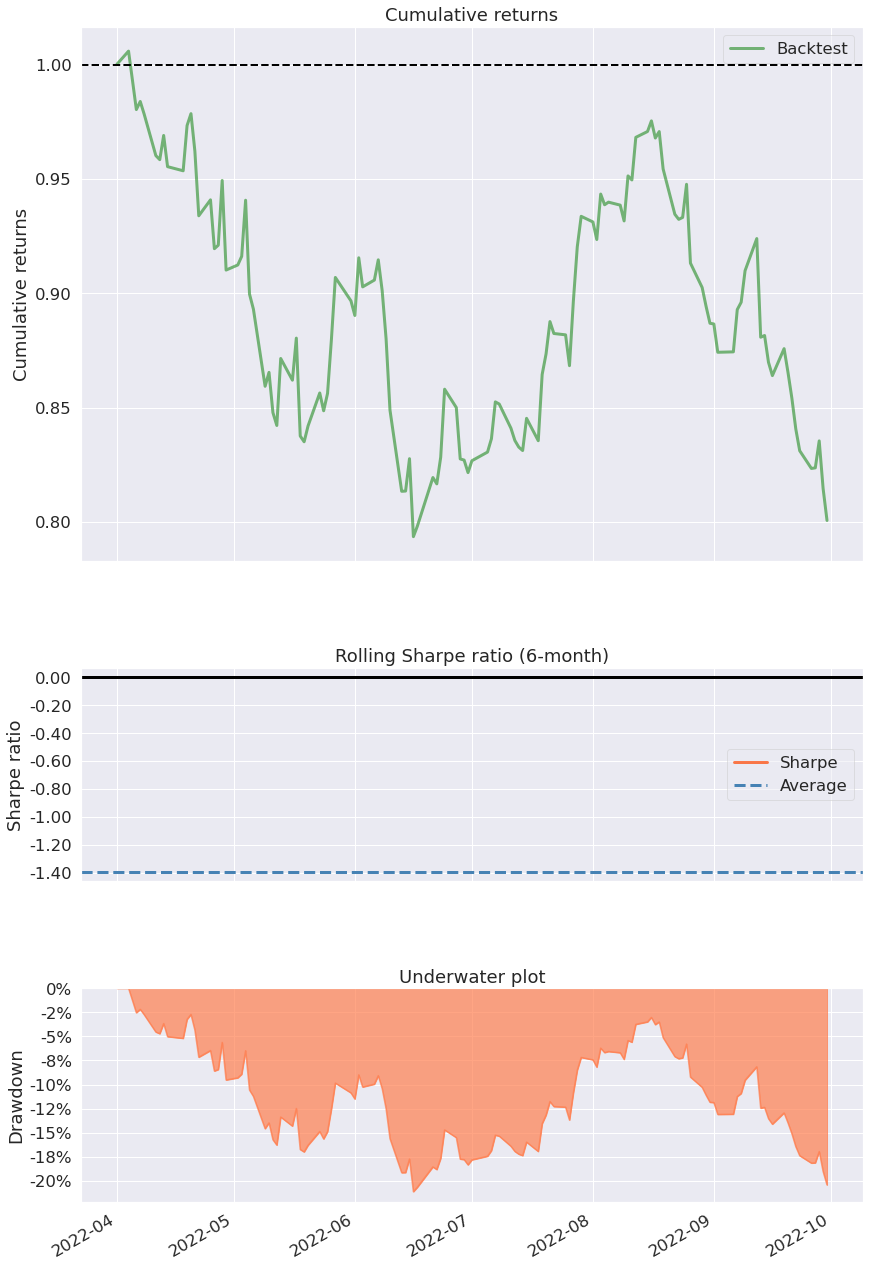

In [17]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio_returns1)
# pf.create_simple_tear_sheet(portfolio_returns2)
# pf.create_simple_tear_sheet(portfolio_returns3)
pf.create_simple_tear_sheet(portfolio_returns4)